In [1]:
import os
import pandas as pd

In [2]:
from scipy.stats import linregress
import seaborn as sns
import numpy as np
import pylab as pl
import plotly.express as px

In [3]:
world_df= pd.read_csv("../Resources/owid-covid-data.csv")

#Unsing total_deaths column and total_cases_per_million, total cases, new cases
updated_world_df=world_df.drop(["iso_code","new_deaths_per_million","total_tests","new_tests",
                                "new_tests_smoothed_per_thousand","population","median_age","aged_70_older",
                                "extreme_poverty","diabetes_prevalence","female_smokers","male_smokers",
                               "handwashing_facilities","hospital_beds_per_thousand","life_expectancy",
                               "new_tests_smoothed","new_tests_per_thousand","tests_units",
                               "new_deaths","new_cases_per_million"], axis=1)

updated_world_df=updated_world_dfupdated_world_df=updated_world_df.rename(columns={"location":"Country", "continent":"Continent","date":"Date",
                                                    "total_cases":"Total Cases", "new_cases":"New Cases",
                                                    "total_cases_per_million": "Total Cases Per Million",
                                                  "total_deaths_per_million":"Total Deaths Per Million",
                                                  "total_tests_per_thousand":"Total Test Per Thousands",
                                                 "population_density":"Population Density","aged_65_older":"Aged 65 or older",
                                                 "gdp_per_capita":"GDP Per Capita","cvd_death_rate":"Covid Death Rate",
                                                 "stringency_index":"Stringency Index","total_deaths":"Total Deaths"})

#updated_world_df.fillna(0, inplace=True)

updated_world_df.head()

,Continent,Country,Date,Total Cases,New Cases,Total Deaths,Total Cases Per Million,Total Deaths Per Million,Total Test Per Thousands,Stringency Index,Population Density,Aged 65 or older,GDP Per Capita,Covid Death Rate
0,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,NaN,NaN,54.422,2.581,1803.987,597.029
1,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,NaN,0.0,54.422,2.581,1803.987,597.029
2,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,NaN,0.0,54.422,2.581,1803.987,597.029
3,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,NaN,0.0,54.422,2.581,1803.987,597.029
4,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,NaN,0.0,54.422,2.581,1803.987,597.029


In [4]:
#Number Hospital Beds is based on the lastest year per Country

data = pd.read_csv("../Resources/data.csv")

who_df = data.iloc[data.groupby("Country")["Year"].agg(pd.Series.idxmax)]
who_df.reset_index(drop=True).set_index("Country")
who_df=who_df.rename(columns={"Hospital beds (per 10 000 population)":"Hospital Beds (per 10K people)"})
hospital_beds_df=who_df.drop(["Year"], axis=1)

hospital_beds_df.head()

,Country,Hospital Beds (per 10K people)
0,Afghanistan,5
16,Albania,29
29,Algeria,19
31,Angola,8
32,Antigua and Barbuda,38


In [5]:
#Smoking Percentage is based on the lastest year per Country

smokingdata = pd.read_csv("../Resources/smokingdata.csv")

smokingdata_df = smokingdata.iloc[smokingdata.groupby("Country")["Year"].agg(pd.Series.idxmax)]

clean_smoking_data = smokingdata_df.drop(["Estimate of current cigarette smoking prevalence (%).1", "Estimate of current cigarette smoking prevalence (%).2", 
                                       "Estimate of current tobacco smoking prevalence (%)", "Estimate of current tobacco smoking prevalence (%).1", 
                                       "Estimate of current tobacco smoking prevalence (%).2", "Estimate of current tobacco use prevalence (%)", 
                                       "Estimate of current tobacco use prevalence (%).1", "Estimate of current tobacco use prevalence (%).2"], axis=1)

 
clean_smoking_data=clean_smoking_data.rename(columns={"Estimate of current cigarette smoking prevalence (%)":"Smoking Prevalence (%)"})
smoking_data = clean_smoking_data
smoking_prevalence=list(smoking_data["Smoking Prevalence (%)"])
smoking_percentage=[]

for x in smoking_prevalence:
    y=x.split("[")
    smoking_percentage.append(y[0])
    

    
column_values = pd.Series(smoking_percentage)
smoking_data.insert(loc=2, column="Smoking Percetage", value=column_values)
smoking_year_df=smoking_data.drop(["Smoking Prevalence (%)"], axis=1)

smoking_df=smoking_year_df.drop(["Year"], axis=1)

smoking_df.head()

,Country,Smoking Percetage
1,Albania,11.20
7,Algeria,15.20
13,Andorra,21.40
19,Argentina,31.40
25,Armenia,6.00


In [6]:
world_df=pd.read_csv("../Resources/dsh_simple.csv")

world_df=world_df[["Countryname","IfclosedduetoCOVID19whend","Statusof Schoolsaresomeall (copy) (group)",
          "Latitude (generated)","Longitude (generated)","Incomelevelname"]]

income_level_df=world_df.rename(columns={"Countryname":"Country", "Latitude (generated)":"Latitude", 
                      "Longitude (generated)": "Longitude", "Incomelevelname": "Income Level",
                        "Statusof Schoolsaresomeall (copy) (group)":"School Status"})
income_df=income_level_df.drop(["IfclosedduetoCOVID19whend"], axis =1)

income_df.head()

,Country,School Status,Latitude,Longitude,Income Level
0,Eritrea,Closed,15.9820,38.0200,Low income
1,Guinea-Bissau,Closed,12.1910,-14.4750,Low income
2,San Marino,Closed,43.9420,12.4611,High income
3,Georgia,Closed,42.0500,43.5760,Upper middle income
4,Italy,Closed,44.3713,11.1084,High income


In [7]:
combined_df=pd.merge(updated_world_df,hospital_beds_df,on="Country",how="left").merge(smoking_df,on="Country",how="left" ).merge(income_df,on="Country",how="left")

combined_df.head()

,Continent,Country,Date,Total Cases,New Cases,Total Deaths,Total Cases Per Million,Total Deaths Per Million,Total Test Per Thousands,Stringency Index,Population Density,Aged 65 or older,GDP Per Capita,Covid Death Rate,Hospital Beds (per 10K people),Smoking Percetage,School Status,Latitude,Longitude,Income Level
0,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,NaN,NaN,54.422,2.581,1803.987,597.029,5.0,NaN,Closed,34.023,65.5267,Low income
1,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,NaN,0.0,54.422,2.581,1803.987,597.029,5.0,NaN,Closed,34.023,65.5267,Low income
2,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,NaN,0.0,54.422,2.581,1803.987,597.029,5.0,NaN,Closed,34.023,65.5267,Low income
3,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,NaN,0.0,54.422,2.581,1803.987,597.029,5.0,NaN,Closed,34.023,65.5267,Low income
4,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,NaN,0.0,54.422,2.581,1803.987,597.029,5.0,NaN,Closed,34.023,65.5267,Low income


In [8]:
#DATA CLEANING

strigency_per_country = combined_df[["Country","Date","Total Cases","Total Cases Per Million",
                                     "New Cases","Total Deaths Per Million",
                                     "Total Deaths","Stringency Index",
                                     "GDP Per Capita","Income Level",
                                    "Continent"]]
strigency_per_country.fillna(0, inplace=True)

#countries without Stringency Index and Number of Tests
no_stringency = strigency_per_country.groupby(["Country"]).mean()
no_stringency_countries = no_stringency[no_stringency["Stringency Index"] == 0].copy()
no_stringency_country_list = no_stringency_countries.index.tolist().copy()

#remove from list countries withouth Stringency Index and Number of Tests
for country in no_stringency_country_list:
    index = strigency_per_country[strigency_per_country["Country"] == country].index.copy()
    strigency_per_country.drop(index, inplace = True)

strigency_per_country.head(5)    

/Users/angelaromansivirichi/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/Users/angelaromansivirichi/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Country,Date,Total Cases,Total Cases Per Million,New Cases,Total Deaths Per Million,Total Deaths,Stringency Index,GDP Per Capita,Income Level,Continent
0,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,1803.987,Low income,Asia
1,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,1803.987,Low income,Asia
2,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,1803.987,Low income,Asia
3,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,1803.987,Low income,Asia
4,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,1803.987,Low income,Asia


In [9]:
import matplotlib.pyplot as plt
%matplotlib notebook



<IPython.core.display.Javascript object>


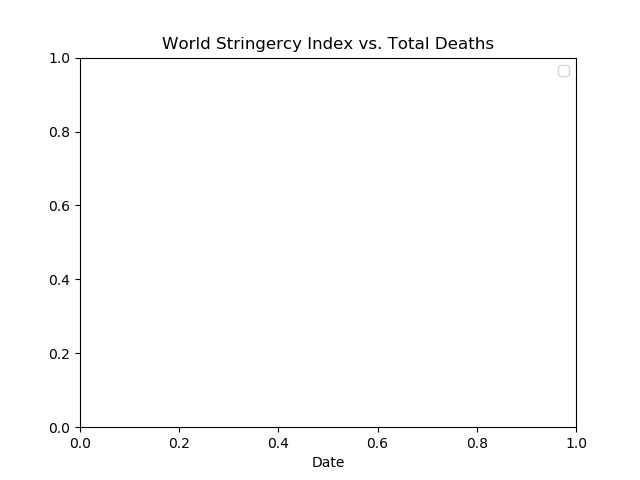

No handles with labels found to put in legend.


In [13]:
#country = input("Enter Coutry:")

country_strigency = list(strigency_per_country[(strigency_per_country["Country"] == country) & (strigency_per_country["Stringency Index"] > 0)]["Stringency Index"])

country_deaths = list(strigency_per_country[(strigency_per_country["Country"] == country) & (strigency_per_country["Stringency Index"] > 0)]["Total Deaths"])

dates=list(strigency_per_country[(strigency_per_country["Country"] == country) & (strigency_per_country["Stringency Index"] > 0)]["Date"])

#plt.plot(dates, country_strigency, label = "Stringency Index", color = "green")
#plt.plot(dates, country_deaths, label = "Total Deaths", color = "red" )

plt.title(f"{country} Stringercy Index vs. Total Deaths")
plt.xlabel("Date")
plt.legend()

#plt.show()


<IPython.core.display.Javascript object>


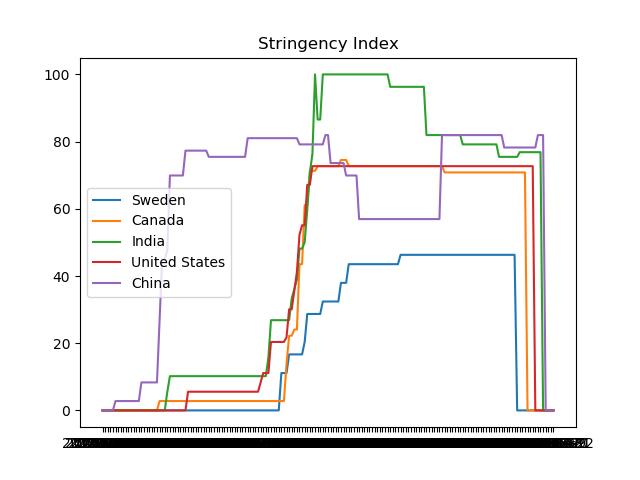

In [14]:
countries=["Sweden","Canada","India","United States", 'China']

for country in countries:
    strigencies = list(strigency_per_country[strigency_per_country["Country"] == country]["Stringency Index"])
    dates=list(strigency_per_country[strigency_per_country["Country"] == country]["Date"])
    plt.plot(dates, strigencies, label=country)

plt.title("Stringency Index")
plt.legend()
plt.show() 
        

<IPython.core.display.Javascript object>


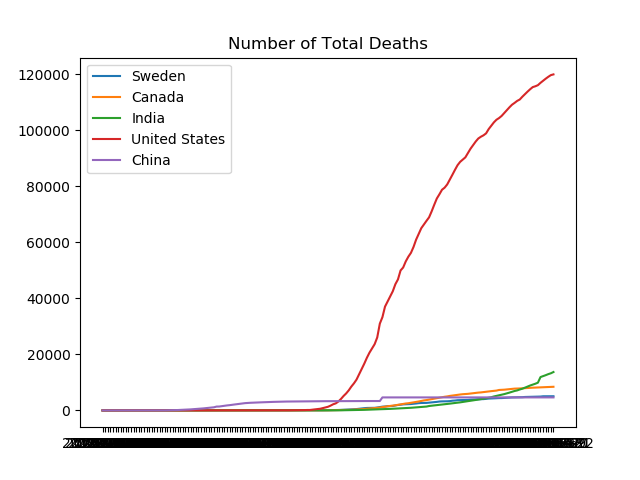

In [15]:
for country in countries:
    total_death = list(strigency_per_country[strigency_per_country["Country"] == country]["Total Deaths"])
    dates=list(strigency_per_country[strigency_per_country["Country"] == country]["Date"])
    plt.plot(dates, total_death, label=country)

plt.title("Number of Total Deaths")
plt.legend()
plt.show() 
        

<IPython.core.display.Javascript object>


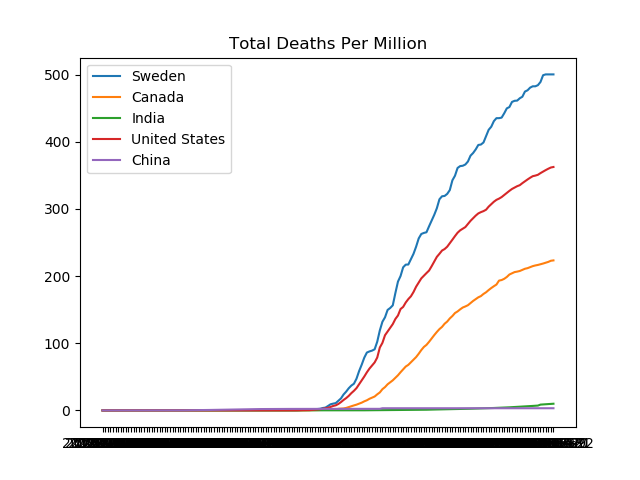

In [16]:
for country in countries:
    total_death = list(strigency_per_country[strigency_per_country["Country"] == country]["Total Deaths Per Million"])
    dates=list(strigency_per_country[strigency_per_country["Country"] == country]["Date"])
    plt.plot(dates, total_death, label=country)

plt.title("Total Deaths Per Million")
plt.legend()
plt.show() 

In [17]:
#Drop San Marino From Data Frame
strigency_per_country_f = strigency_per_country[strigency_per_country["Country"] != "San Marino"]

strigency_per_country_f 

,Country,Date,Total Cases,Total Cases Per Million,New Cases,Total Deaths Per Million,Total Deaths,Stringency Index,GDP Per Capita,Income Level,Continent
0,Afghanistan,2019-12-31,0.0,0.000,0.0,0.000,0.0,0.0,1803.987,Low income,Asia
1,Afghanistan,2020-01-01,0.0,0.000,0.0,0.000,0.0,0.0,1803.987,Low income,Asia
2,Afghanistan,2020-01-02,0.0,0.000,0.0,0.000,0.0,0.0,1803.987,Low income,Asia
3,Afghanistan,2020-01-03,0.0,0.000,0.0,0.000,0.0,0.0,1803.987,Low income,Asia
4,Afghanistan,2020-01-04,0.0,0.000,0.0,0.000,0.0,0.0,1803.987,Low income,Asia
...,...,...,...,...,...,...,...,...,...,...,...
25253,Zimbabwe,2020-06-18,401.0,26.980,7.0,0.269,4.0,0.0,1899.775,Lower middle income,Africa
25254,Zimbabwe,2020-06-19,463.0,31.151,62.0,0.269,4.0,0.0,1899.775,Lower middle income,Africa
25255,Zimbabwe,2020-06-20,479.0,32.228,16.0,0.269,4.0,0.0,1899.775,Lower middle income,Africa
25256,Zimbabwe,2020-06-21,486.0,32.699,7.0,0.404,6.0,0.0,1899.775,Lower middle income,Africa


In [21]:
max_stringency = strigency_per_country_f .groupby("Country").agg({"Stringency Index":"max"})
max_total_deaths_permillion = strigency_per_country_f .groupby("Country").agg({"Total Deaths Per Million":"max"})
max_total_deaths = strigency_per_country_f .groupby("Country").agg({"Total Deaths":"max"})
max_total_cases = strigency_per_country_f .groupby("Country").agg({"Total Cases Per Million":"max"})
income = strigency_per_country_f .groupby("Country").agg({"Income Level":"unique"})
continent = strigency_per_country_f .groupby("Country").agg({"Continent":"unique"})

combined_stringency = pd.merge(max_stringency,max_total_deaths_permillion,on="Country",how="inner").merge(income,on="Country",how="inner").merge(max_total_deaths, on="Country", how="left").merge(max_total_cases, on="Country", how="left").merge(continent, on="Country", how="left")

combined_stringency_df = combined_stringency[combined_stringency["Income Level"] != 0]
combined_stringency_df

income=[]
continent_list=[]
for index, row in combined_stringency_df.iterrows():
    x=row["Income Level"][0]
    y=row["Continent"][0]
    income.append(x)
    continent_list.append(y)
    
combined_stringency_df["Country Income Level"]=income
combined_stringency_df["Continents"]=continent_list   
    
combined_stg_df = combined_stringency_df.reset_index()
combined_stg_df


/Users/angelaromansivirichi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/angelaromansivirichi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Country,Stringency Index,Total Deaths Per Million,Income Level,Total Deaths,Total Cases Per Million,Continent,Country Income Level,Continents
0,Afghanistan,84.26,14.925,[Low income],581.0,740.669,[Asia],Low income,Asia
1,Albania,89.81,15.289,[Upper middle income],44.0,669.609,[Europe],Upper middle income,Europe
2,Algeria,92.13,19.270,[Upper middle income],845.0,268.431,[Africa],Upper middle income,Africa
3,Angola,90.74,0.274,[Lower middle income],9.0,5.355,[Africa],Lower middle income,Africa
4,Argentina,100.00,22.369,[Upper middle income],1011.0,946.372,[South America],Upper middle income,South America
...,...,...,...,...,...,...,...,...,...
142,Uruguay,72.22,7.197,[High income],25.0,252.179,[South America],High income,South America
143,Uzbekistan,96.30,0.568,[Lower middle income],19.0,189.966,[Asia],Lower middle income,Asia
144,Vietnam,96.30,0.000,[Lower middle income],0.0,3.585,[Asia],Lower middle income,Asia
145,Zambia,70.83,0.598,[Lower middle income],11.0,77.785,[Africa],Lower middle income,Africa


In [22]:

sorted_stg = combined_stg_df.sort_values("Stringency Index")
sorted_stg.head()

,Country,Stringency Index,Total Deaths Per Million,Income Level,Total Deaths,Total Cases Per Million,Continent,Country Income Level,Continents
97,Nicaragua,16.67,9.661,[Lower middle income],64.0,304.020,[North America],Lower middle income,North America
12,Belarus,19.44,36.616,[Upper middle income],346.0,6191.450,[Europe],Upper middle income,Europe
24,Burundi,22.22,0.084,[Low income],1.0,12.110,[Africa],Low income,Africa
128,Sweden,46.30,500.333,[High income],5053.0,5549.213,[Europe],High income,Europe
69,Japan,47.22,7.535,[High income],953.0,141.655,[Asia],High income,Asia


In [24]:
fig = px.scatter(combined_stg_df, x = "Stringency Index", y = "Total Deaths Per Million", 
                facet_col="Continents", hover_name = "Country", trendline="ols", color="Continents",
                labels = {"Stringency Index":"Stringency Index"})
fig.update_layout(title="xxxxxxxxxx")
fig.show()

<IPython.core.display.Javascript object>


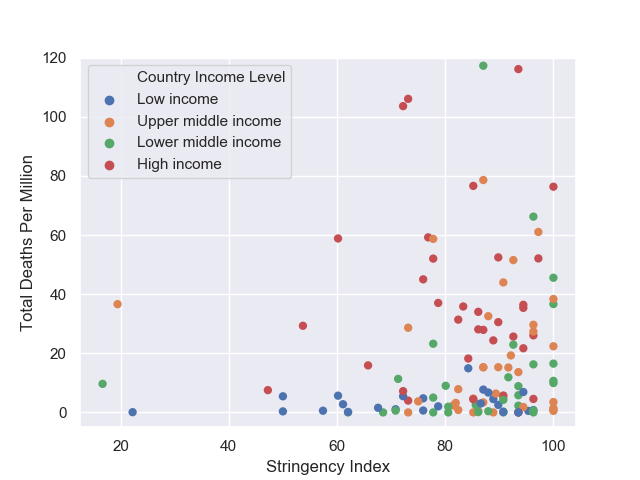

<IPython.core.display.Javascript object>


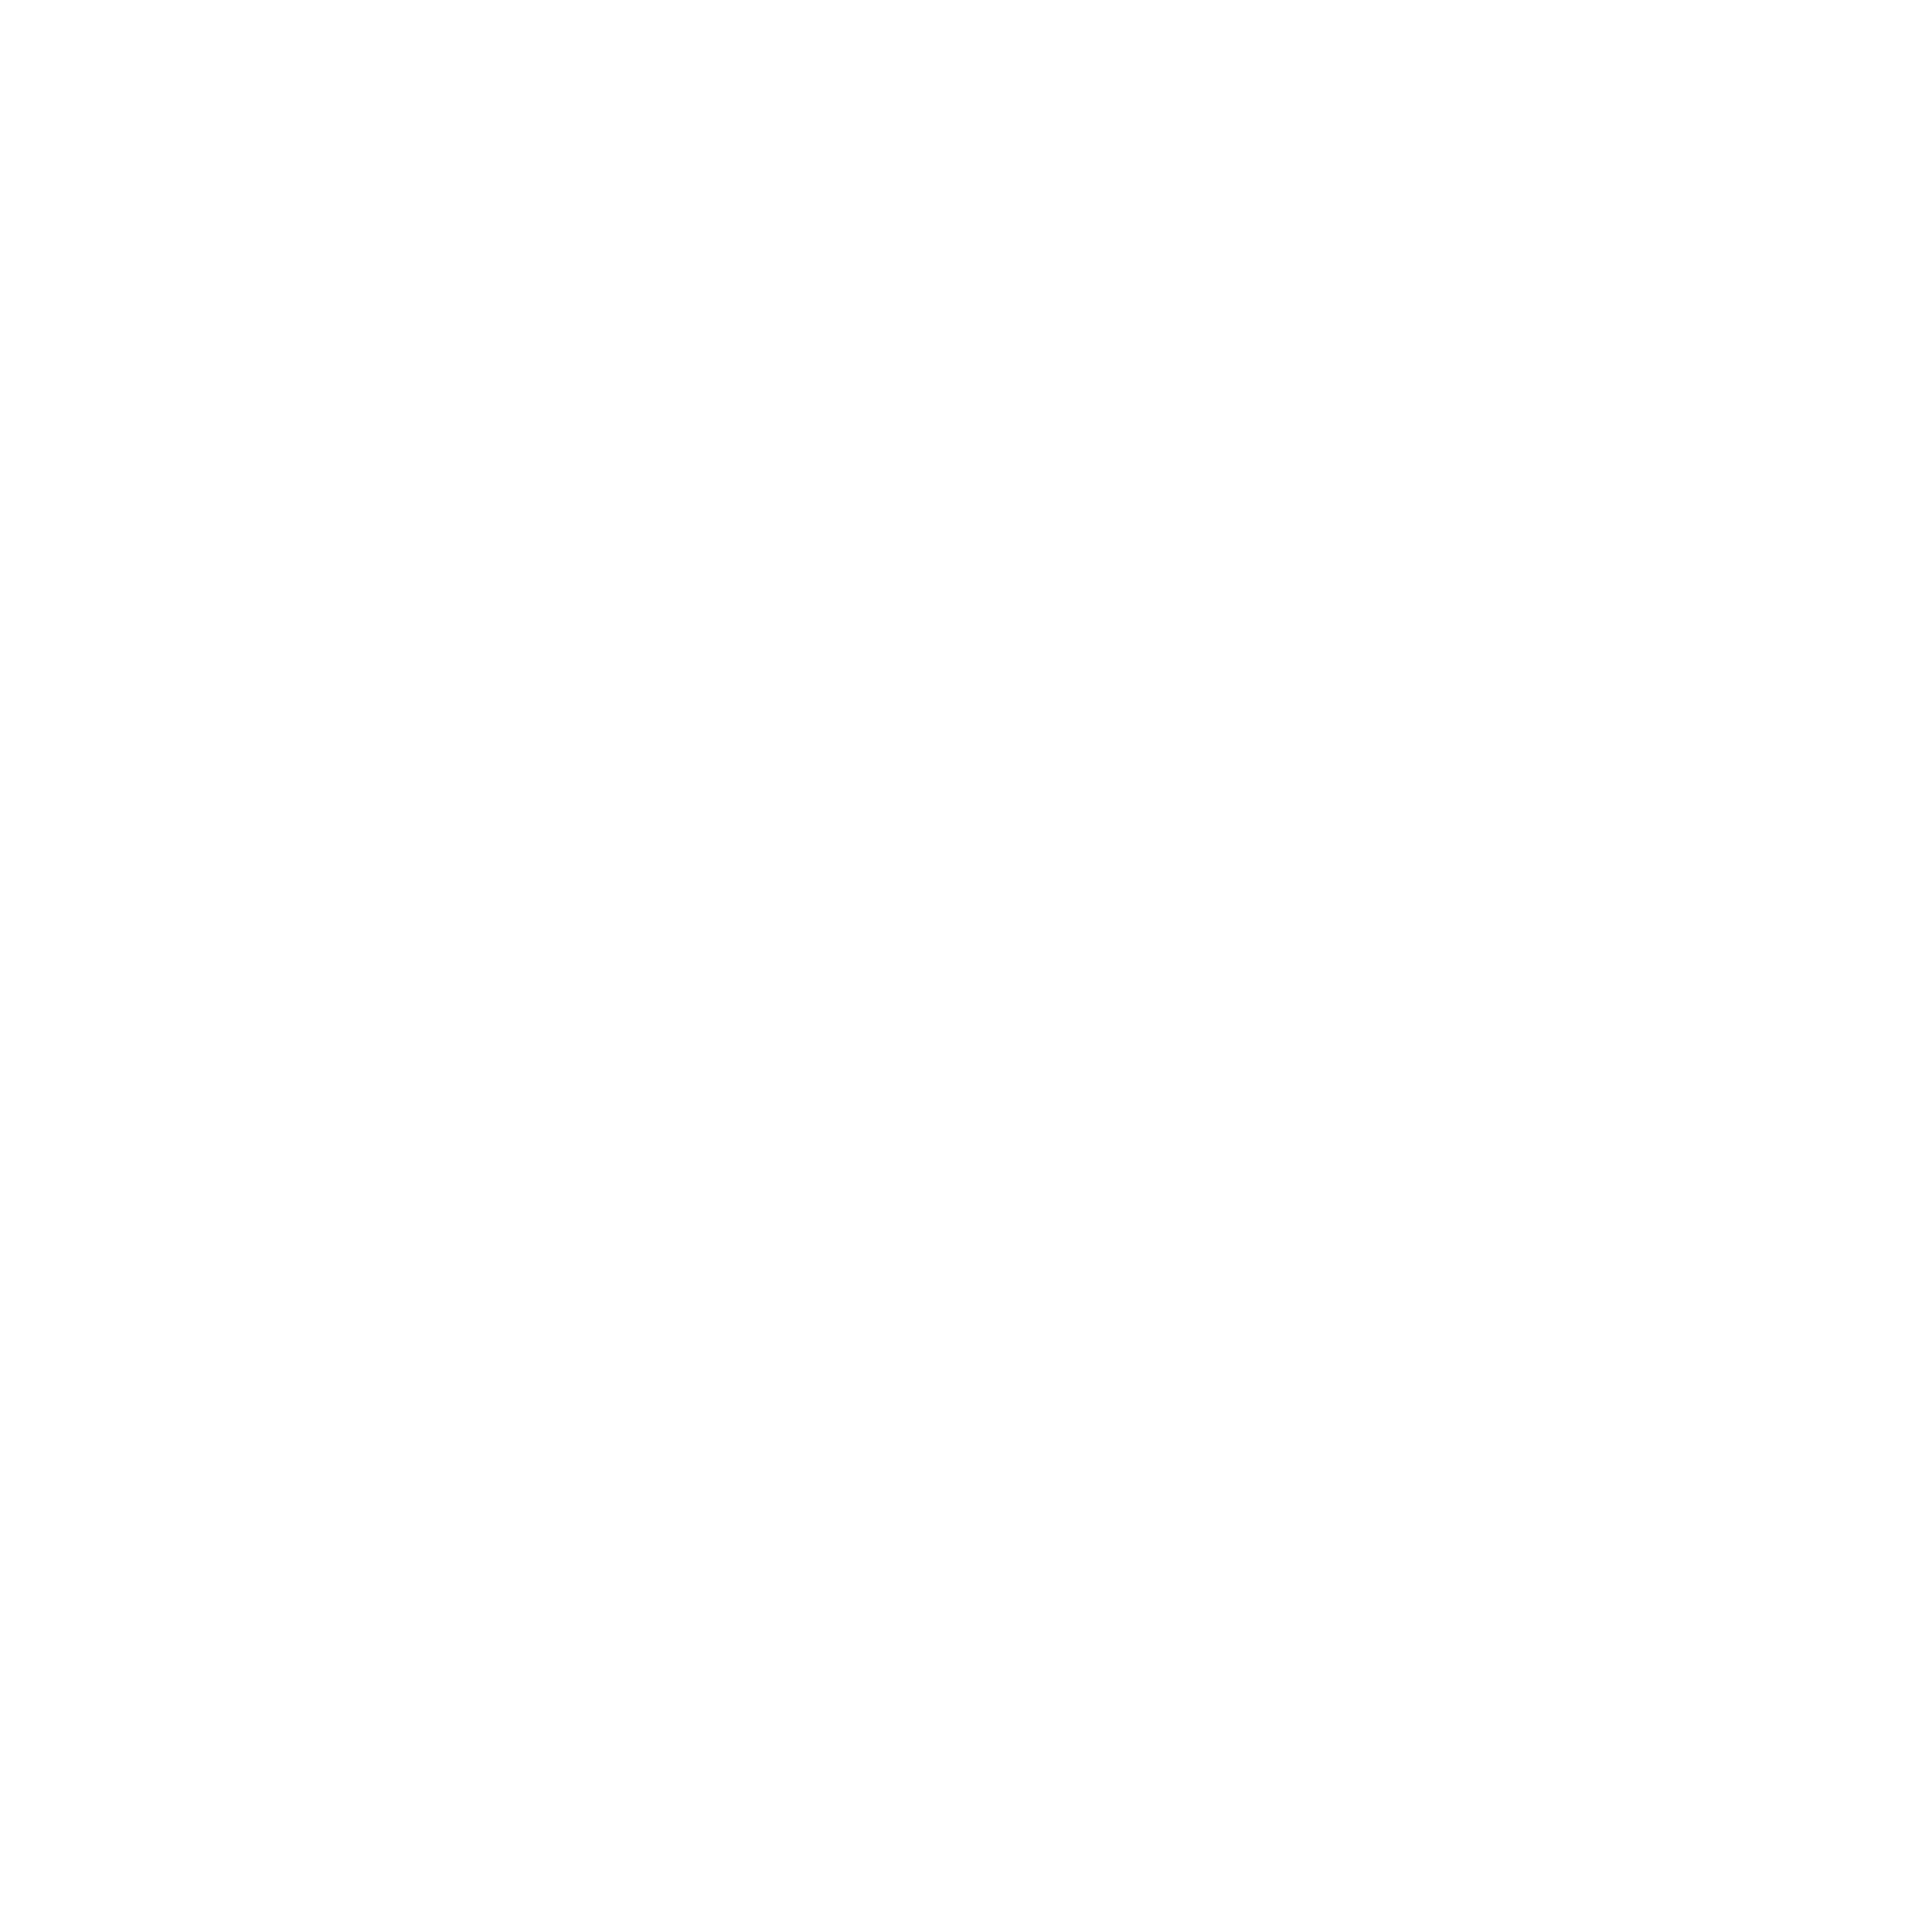

In [25]:
sns.set()
sns.scatterplot(data = combined_stg_df, x = "Stringency Index", y = "Total Deaths Per Million", color = 'darkred',
                edgecolor = 'none'
                ,alpha = 1, hue = "Country Income Level")

plt.ylim(-5, 120)
plt.figure(figsize=(25,25))
plt.show()

<IPython.core.display.Javascript object>


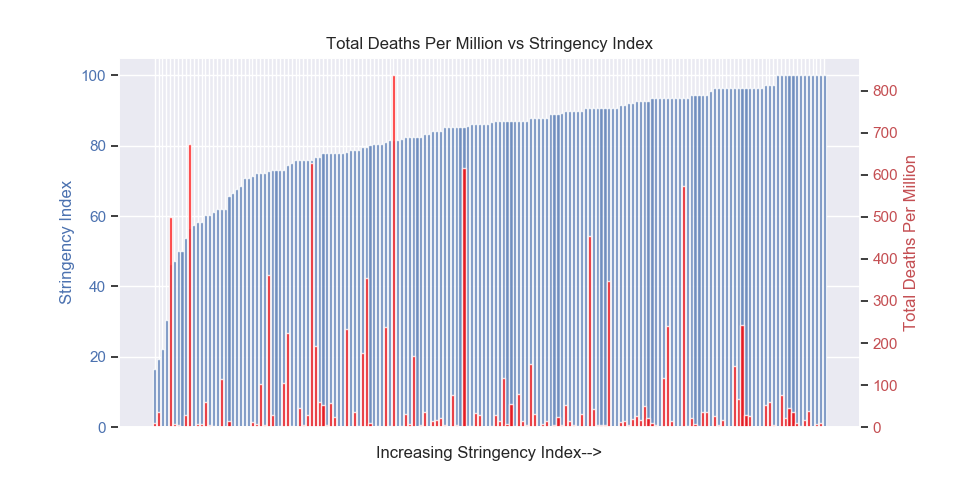

In [65]:
import pylab as pl

#Plot graph with 2 y axes
fig, ax1 = plt.subplots()

#Plot bars
ax1.bar(sorted_stg["Country"], sorted_stg["Stringency Index"], alpha=0.8)
ax1.set_xlabel('Increasing Stringency Index-->')

# Make the y-axis label and tick labels match the line color.
ax1.set_ylabel('Stringency Index', color='b')
[tl.set_color('b') for tl in ax1.get_yticklabels()]

#Set up ax2 to be the second y axis with x shared
ax2 = ax1.twinx()
#Plot a line
ax2.bar(sorted_stg["Country"], sorted_stg["Total Deaths Per Million"], color = "red", alpha=0.8)


# Make the y-axis label and tick labels match the line color.
ax2.set_ylabel('Total Deaths Per Million', color='r')
[tl.set_color('r') for tl in ax2.get_yticklabels()]

plt.title("Total Deaths Per Million vs Stringency Index")
ax1.set_xticklabels("")

plt.grid()
plt.savefig("../Images/Total_Deaths_Per_Million.png")
plt.show()



In [129]:
#COUNTRIES WITH HIGHEST TOTAL NUMBER OF DEATHS PER MILLION
top_totaldeaths_permillion =  sorted_stg[sorted_stg["Total Deaths Per Million"]>200]
top_totaldeaths_permillion_df = top_totaldeaths_permillion.sort_values(by=["Total Deaths Per Million"], ascending=False).reset_index(drop=True)
top_totaldeaths_permillion_df


,Country,Stringency Index,Total Deaths Per Million,Income Level,Total Deaths,Total Cases Per Million
0,San Marino,92.59,1237.551,[High income],42.0,21008.899
1,Belgium,81.48,836.611,[High income],9696.0,5224.504
2,Andorra,56.48,673.008,[0],52.0,11065.812
3,United Kingdom,75.93,627.994,[High income],42632.0,4482.971
4,Spain,85.19,614.953,[High income],28752.0,5267.311
5,Italy,93.52,572.824,[High income],34634.0,3944.621
6,Sweden,46.30,500.333,[High income],5053.0,5549.213
7,France,90.74,454.089,[High income],29640.0,2457.000
8,United States,72.69,362.459,[High income],119975.0,6890.918
9,Netherlands,79.63,355.416,[High income],6090.0,2894.273


<IPython.core.display.Javascript object>


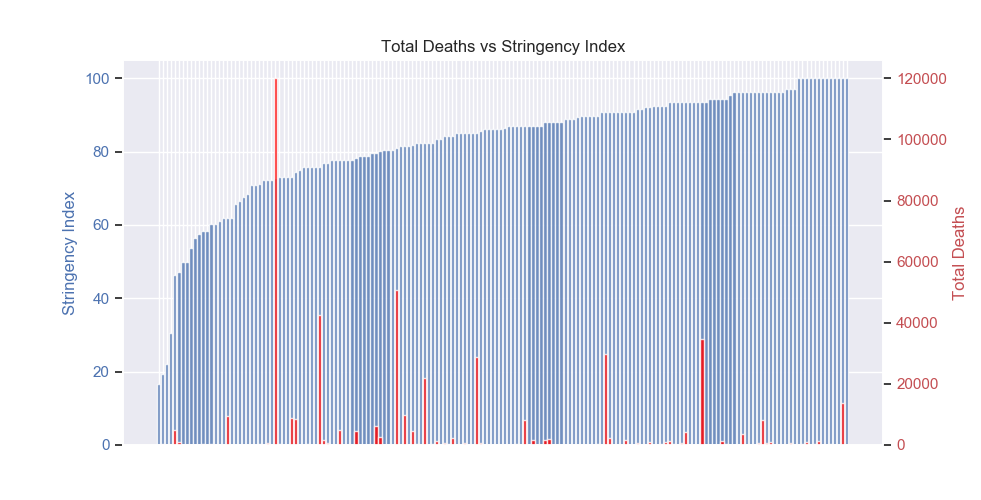

In [66]:
import pylab as pl

#Plot graph with 2 y axes
fig, ax1 = plt.subplots()

#Plot bars
ax1.bar(sorted_stg["Country"], sorted_stg["Stringency Index"], alpha=0.8)
ax1.set_xlabel('')

# Make the y-axis label and tick labels match the line color.
ax1.set_ylabel('Stringency Index', color='b')
[tl.set_color('b') for tl in ax1.get_yticklabels()]

#Set up ax2 to be the second y axis with x shared
ax2 = ax1.twinx()
#Plot bar
ax2.bar(sorted_stg["Country"], sorted_stg["Total Deaths"], color="red",alpha=0.8)


# Make the y-axis label and tick labels match the line color.
ax2.set_ylabel('Total Deaths', color='r')
[tl.set_color('r') for tl in ax2.get_yticklabels()]

plt.title("Total Deaths vs Stringency Index")
ax1.set_xticklabels("")

plt.grid()
plt.savefig("../Images/Total_Deaths.png")
plt.show()

In [67]:
#COUNTRIES WITH HIGHEST TOTAL NUMBER OF DEATHS 
top_totaldeaths =  sorted_stg[sorted_stg["Total Deaths"]>7800]
top_totaldeaths_df = top_totaldeaths.sort_values(by=["Total Deaths"], ascending=False).reset_index(drop=True)
top_totaldeaths_df

,Country,Stringency Index,Total Deaths Per Million,Income Level,Total Deaths,Total Cases Per Million
0,United States,72.69,362.459,[High income],119975.0,6890.918
1,Brazil,81.02,238.131,[Upper middle income],50617.0,5104.634
2,United Kingdom,75.93,627.994,[High income],42632.0,4482.971
3,Italy,93.52,572.824,[High income],34634.0,3944.621
4,France,90.74,454.089,[High income],29640.0,2457.000
5,Spain,85.19,614.953,[High income],28752.0,5267.311
6,Mexico,82.41,169.274,[Upper middle income],21825.0,1400.304
7,India,100.00,9.927,[Lower middle income],13699.0,308.174
8,Belgium,81.48,836.611,[High income],9696.0,5224.504
9,Iran,62.04,114.569,[0],9623.0,2440.109


<IPython.core.display.Javascript object>


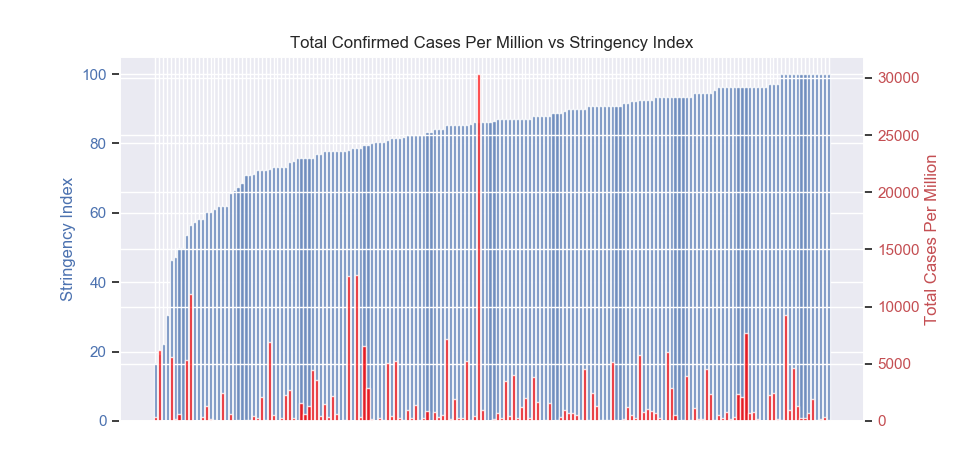

In [71]:
#Plot graph with 2 y axes
fig, ax1 = plt.subplots()

#Plot bars
ax1.bar(sorted_stg["Country"], sorted_stg["Stringency Index"], alpha=0.8)
ax1.set_xlabel('')

# Make the y-axis label and tick labels match the line color.
ax1.set_ylabel('Stringency Index', color='b')
[tl.set_color('b') for tl in ax1.get_yticklabels()]

#Set up ax2 to be the second y axis with x shared
ax2 = ax1.twinx()
#Plot a line
ax2.bar(sorted_stg["Country"], sorted_stg["Total Cases Per Million"], color= 'red' , alpha=0.8)


# Make the y-axis label and tick labels match the line color.
ax2.set_ylabel('Total Cases Per Million', color='r')
[tl.set_color('r') for tl in ax2.get_yticklabels()]

plt.title("Total Confirmed Cases Per Million vs Stringency Index")
ax1.set_xticklabels("")

plt.savefig("../Images/Total_Deaths_Per_Million.png")
plt.show()

In [139]:
#COUNTRIES WITH HIGHEST TOTAL CASES PER MILLION
top_cases_permillion =  sorted_stg[sorted_stg["Total Cases Per Million"]>5500]
top_cases_permillion_df = top_cases_permillion.sort_values(by=["Total Cases Per Million"], ascending=False).reset_index(drop=True)
top_cases_permillion_df



,Country,Stringency Index,Total Deaths Per Million,Income Level,Total Deaths,Total Cases Per Million
0,Qatar,86.11,34.015,[High income],98.0,30325.297
1,San Marino,92.59,1237.551,[High income],42.0,21008.899
2,Bahrain,78.70,37.024,[High income],63.0,12790.443
3,Chile,78.24,234.304,[High income],4479.0,12677.984
4,Andorra,56.48,673.008,[0],52.0,11065.812
5,Kuwait,100.00,76.337,[High income],326.0,9284.490
6,Peru,96.30,243.996,[Upper middle income],8045.0,7731.930
7,Singapore,85.19,4.444,[High income],26.0,7195.305
8,United States,72.69,362.459,[High income],119975.0,6890.918
9,Luxembourg,79.63,175.726,[High income],110.0,6581.722


In [14]:
#USA

usa = strigency_per_country[strigency_per_country["Country"]== "United States"]
usa

,Country,Date,Total Cases,Total Cases Per Million,New Cases,Total Deaths Per Million,Total Deaths,Stringency Index,GDP Per Capita,Income Level
24098,United States,2019-12-31,0.0,0.000,0.0,0.000,0.0,0.0,54225.446,High income
24099,United States,2020-01-01,0.0,0.000,0.0,0.000,0.0,0.0,54225.446,High income
24100,United States,2020-01-02,0.0,0.000,0.0,0.000,0.0,0.0,54225.446,High income
24101,United States,2020-01-03,0.0,0.000,0.0,0.000,0.0,0.0,54225.446,High income
24102,United States,2020-01-04,0.0,0.000,0.0,0.000,0.0,0.0,54225.446,High income
...,...,...,...,...,...,...,...,...,...,...
24268,United States,2020-06-18,2163290.0,6535.567,25559.0,355.638,117717.0,0.0,54225.446,High income
24269,United States,2020-06-19,2191052.0,6619.440,27762.0,357.804,118434.0,0.0,54225.446,High income
24270,United States,2020-06-20,2220961.0,6709.798,29909.0,359.852,119112.0,0.0,54225.446,High income
24271,United States,2020-06-21,2255119.0,6812.994,34158.0,361.686,119719.0,0.0,54225.446,High income


<IPython.core.display.Javascript object>


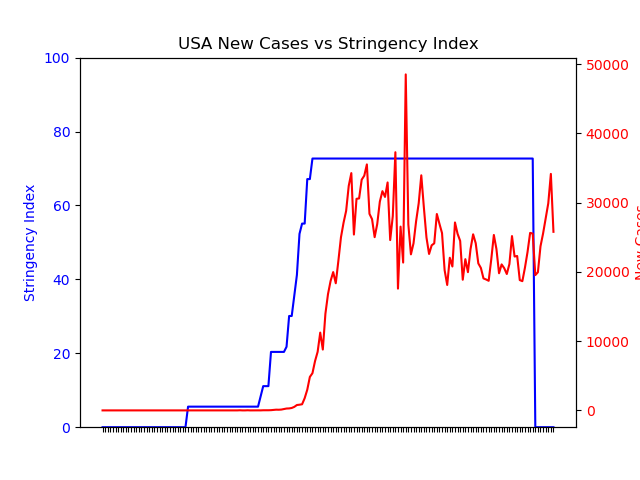

In [51]:
#Plot graph with 2 y axes
fig, ax1 = plt.subplots()

#Plot bars
ax1.plot(usa["Date"], usa["Stringency Index"], "b-")
ax1.set_xlabel('')

# Make the y-axis label and tick labels match the line color.
ax1.set_ylabel('Stringency Index', color='b')
[tl.set_color('b') for tl in ax1.get_yticklabels()]

#Set up ax2 to be the second y axis with x shared
ax2 = ax1.twinx()
#Plot a line
ax2.plot(usa["Date"], usa["New Cases"], "r-")


# Make the y-axis label and tick labels match the line color.
ax2.set_ylabel("New Cases", color="r")
[tl.set_color("r") for tl in ax2.get_yticklabels()]

plt.title("USA New Cases vs Stringency Index")
ax1.set_xticklabels("")

ax1.set_ylim([0,100])


#plt.fill_between(0,usa["Stringency Index"], color="blue")
#ax2=
#plt.savefig("../Images/.png")
plt.show()
#plt.close()

In [34]:
#Germany
germany = strigency_per_country[strigency_per_country["Country"]== "Germany"]


<IPython.core.display.Javascript object>


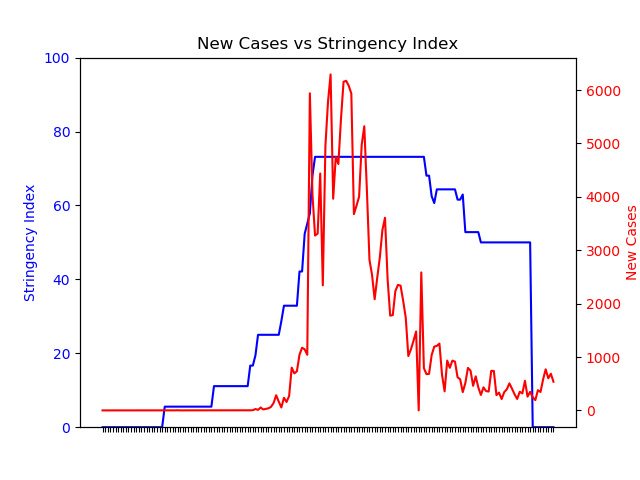

In [52]:
#Plot graph with 2 y axes
fig, ax1 = plt.subplots()

#Plot bars
ax1.plot(germany["Date"], germany["Stringency Index"], "b-")
ax1.set_xlabel('')

# Make the y-axis label and tick labels match the line color.
ax1.set_ylabel('Stringency Index', color='b')
[tl.set_color('b') for tl in ax1.get_yticklabels()]

#Set up ax2 to be the second y axis with x shared
ax2 = ax1.twinx()
#Plot a line
ax2.plot(germany["Date"], germany["New Cases"], "r-")


# Make the y-axis label and tick labels match the line color.
ax2.set_ylabel("New Cases", color="r")
[tl.set_color("r") for tl in ax2.get_yticklabels()]

plt.title("New Cases vs Stringency Index")
ax1.set_xticklabels("")

ax1.set_ylim([0,100])
#plt.fill_between(0,usa["Stringency Index"], color="blue")
#ax2=
#plt.savefig("../Images/.png")
plt.show()
#plt.close()

In [35]:
sweden = strigency_per_country[strigency_per_country["Country"]== "Sweden"]


<IPython.core.display.Javascript object>


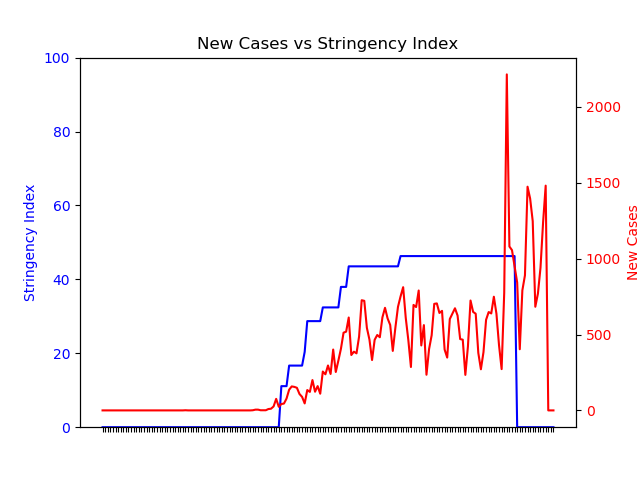

In [53]:
#Plot graph with 2 y axes
fig, ax1 = plt.subplots()

#Plot bars
ax1.plot(sweden["Date"], sweden["Stringency Index"], "b-")
ax1.set_xlabel('')

# Make the y-axis label and tick labels match the line color.
ax1.set_ylabel('Stringency Index', color='b')
[tl.set_color('b') for tl in ax1.get_yticklabels()]

#Set up ax2 to be the second y axis with x shared
ax2 = ax1.twinx()
#Plot a line
ax2.plot(sweden["Date"], sweden["New Cases"], "r-")


# Make the y-axis label and tick labels match the line color.
ax2.set_ylabel("New Cases", color="r")
[tl.set_color("r") for tl in ax2.get_yticklabels()]

plt.title("New Cases vs Stringency Index")
ax1.set_xticklabels("")

ax1.set_ylim([0,100])
#plt.fill_between(0,usa["Stringency Index"], color="blue")
#ax2=
#plt.savefig("../Images/.png")
plt.show()
#plt.close()


In [49]:
peru = strigency_per_country[strigency_per_country["Country"]== "Peru"]

<IPython.core.display.Javascript object>


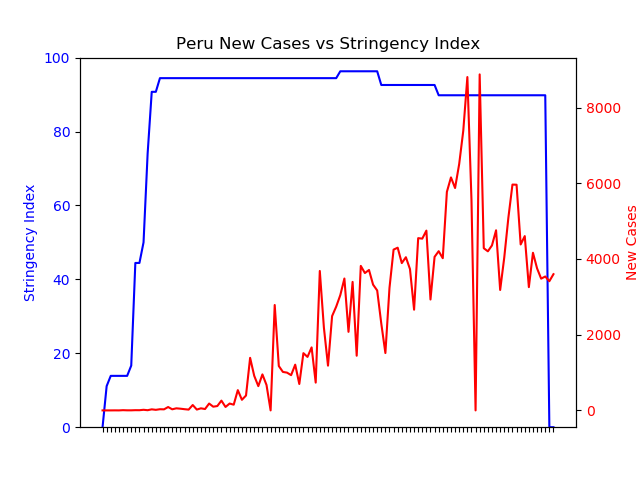

In [54]:
#Plot graph with 2 y axes
fig, ax1 = plt.subplots()

#Plot bars
ax1.plot(peru["Date"], peru["Stringency Index"], "b-")
ax1.set_xlabel('')

# Make the y-axis label and tick labels match the line color.
ax1.set_ylabel('Stringency Index', color='b')
[tl.set_color('b') for tl in ax1.get_yticklabels()]

#Set up ax2 to be the second y axis with x shared
ax2 = ax1.twinx()
#Plot a line
ax2.plot(peru["Date"], peru["New Cases"], "r-")


# Make the y-axis label and tick labels match the line color.
ax2.set_ylabel("New Cases", color="r")
[tl.set_color("r") for tl in ax2.get_yticklabels()]

plt.title("Peru New Cases vs Stringency Index")
ax1.set_xticklabels("")

ax1.set_ylim([0,100])
#plt.fill_between(0,usa["Stringency Index"], color="blue")
#ax2=
#plt.savefig("../Images/.png")
plt.show()
#plt.close()

<IPython.core.display.Javascript object>


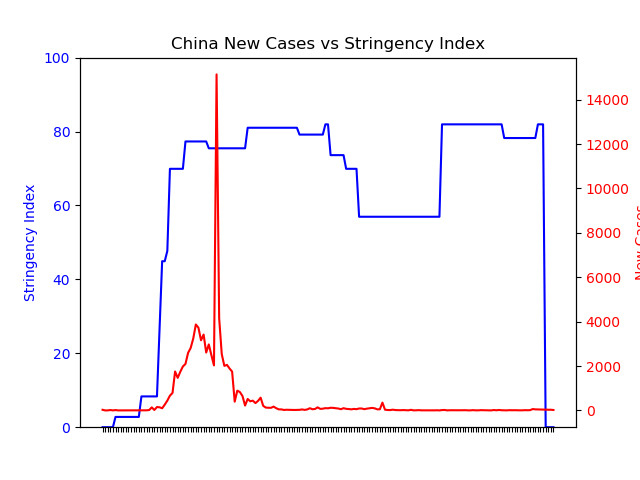

In [56]:
china = strigency_per_country[strigency_per_country["Country"]== "China"]
#Plot graph with 2 y axes
fig, ax1 = plt.subplots()

#Plot bars
ax1.plot(china["Date"], china["Stringency Index"], "b-")
ax1.set_xlabel('')

# Make the y-axis label and tick labels match the line color.
ax1.set_ylabel('Stringency Index', color='b')
[tl.set_color('b') for tl in ax1.get_yticklabels()]

#Set up ax2 to be the second y axis with x shared
ax2 = ax1.twinx()
#Plot a line
ax2.plot(china["Date"], china["New Cases"], "r-")


# Make the y-axis label and tick labels match the line color.
ax2.set_ylabel("New Cases", color="r")
[tl.set_color("r") for tl in ax2.get_yticklabels()]

plt.title("China New Cases vs Stringency Index")
ax1.set_xticklabels("")

ax1.set_ylim([0,100])
#plt.fill_between(0,usa["Stringency Index"], color="blue")
#ax2=
#plt.savefig("../Images/.png")
plt.show()
#plt.close()